# INTRODUCTION
Obesity is a medical condition characterized by excessive or abnormal accumulation of body fat that poses health risks. It is typically determined by measuring an individual's body mass index (BMI), which is calculated using their weight and height. Obesity is associated with various negative health effects, including an increased risk of developing chronic conditions such as diabetes, heart disease, certain cancers, and musculoskeletal disorders. Factors contributing to obesity include a combination of genetic, environmental, behavioral, and socioeconomic influences. Effective management and prevention of obesity involve lifestyle modifications, including a balanced diet, regular physical activity, behavior changes, and, in some cases, medical interventions.

# Details on the dataset.
This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.
# source
https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub
  

# The columns in the "ObesityDataSet_raw_and_data_sinthetic.csv" dataset are described as follows:

1. 'Gender': Represents the gender of the individual (Male/Female).
2. 'Age': Indicates the age of the individual in years.
3. 'Height': Specifies the height of the individual in centimeters.
4. 'Weight': Represents the weight of the individual in kilograms.
5. 'family_history_with_overweight': Indicates whether the individual has a family history of overweight (Yes/No).
6. 'FAVC': Represents whether the individual consumes high-calorie food frequently (Yes/No).
7. 'FCVC': Indicates the frequency of consumption of vegetables by the individual (ranging from 1 to 3).
8. 'NCP': Represents the number of main meals consumed by the individual per day (ranging from 1 to 3).
9. 'CAEC': Represents the frequency of consumption of food between meals by the individual (ranging from 0 to 3).
10. 'SMOKE': Indicates whether the individual is a smoker or not (Yes/No).
11. 'CH2O': Represents the daily water intake of the individual in liters.
12. 'SCC': Indicates whether the individual monitors the number of calories consumed (Yes/No).
13. 'FAF': Represents the frequency of physical activity by the individual (ranging from 0 to 3).
14. 'TUE': Indicates the time spent using electronic devices per day in hours.
15. 'CALC': Represents whether the individual follows a special diet or not (Yes/No).
16. 'MTRANS': Indicates the mode of transportation used by the individual (ranging from 1 to 5).
17. 'NObeyesdad': Represents the weight status of the individual based on the WHO BMI classification (ranging from 0 to 6).

# Goal of the Project. Problem Statement
To develop a model that can be used to predict whether an individual based on weight cap is at risk of of being obesity , normal weight or underweight.

# 1.Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
import json

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')


Load Libraries-Done


# 2. Load the dataset

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.shape

(2111, 17)

In [9]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
df = df.rename(columns={'NObeyesdad': 'Obesitylevel'})
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesitylevel
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [11]:
df['Obesitylevel'].unique()


array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

histogram distribution of obesity levels

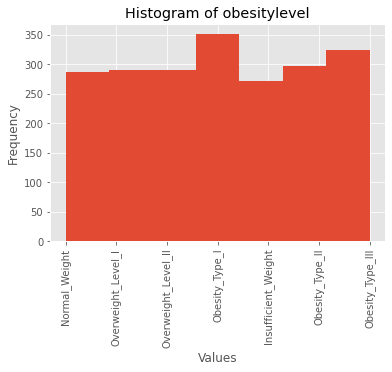

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column 'column_name'

# Plot histogram
plt.hist(df["Obesitylevel"], bins=7)  # Adjust the number of bins as desired

# Add labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of obesitylevel")
plt.xticks(rotation=90)
# Display the plot
plt.show()


# 3. Exploratory Data Analysis

# Data encoding

In [13]:
weight_order=  ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

In [14]:
# making new dataframe
df_prep = df.copy()
ord_feature_list= ["Gender","family_history_with_overweight",
                                          "FAVC","CAEC","SMOKE","SCC","CALC","MTRANS", "Obesitylevel"]

In [15]:
#encoding
from sklearn.preprocessing import OrdinalEncoder
df_ord=df_prep[ord_feature_list]

enc = OrdinalEncoder()
enc.fit(df_ord)
df_ord_arr=enc.transform(df_ord)

encoded_cat_df=pd.DataFrame(df_ord_arr, columns=ord_feature_list)
encoded_cat_df

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesitylevel
0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
2106,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


In [16]:
df = pd.concat( [df[df.columns.difference(ord_feature_list)] , encoded_cat_df ], axis= 1)
df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesitylevel
0,21.000000,2.000000,0.000000,2.0,1.620000,3.0,1.000000,64.000000,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,21.000000,3.000000,3.000000,3.0,1.520000,3.0,0.000000,56.000000,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,23.000000,2.000000,2.000000,2.0,1.800000,3.0,1.000000,77.000000,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,27.000000,2.000000,2.000000,3.0,1.800000,3.0,0.000000,87.000000,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,22.000000,2.000000,0.000000,2.0,1.780000,1.0,0.000000,89.800000,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.728139,1.676269,3.0,1.710730,3.0,0.906247,131.408528,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,21.982942,2.005130,1.341390,3.0,1.748584,3.0,0.599270,133.742943,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,22.524036,2.054193,1.414209,3.0,1.752206,3.0,0.646288,133.689352,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,24.361936,2.852339,1.139107,3.0,1.739450,3.0,0.586035,133.346641,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


In [17]:
df.head()

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesitylevel
0,21.0,2.0,0.0,2.0,1.62,3.0,1.0,64.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
1,21.0,3.0,3.0,3.0,1.52,3.0,0.0,56.0,0.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0,1.0
2,23.0,2.0,2.0,2.0,1.80,3.0,1.0,77.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,27.0,2.0,2.0,3.0,1.80,3.0,0.0,87.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,22.0,2.0,0.0,2.0,1.78,1.0,0.0,89.8,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0


In [18]:
df.isnull().sum()

Age                               0
CH2O                              0
FAF                               0
FCVC                              0
Height                            0
NCP                               0
TUE                               0
Weight                            0
Gender                            0
family_history_with_overweight    0
FAVC                              0
CAEC                              0
SMOKE                             0
SCC                               0
CALC                              0
MTRANS                            0
Obesitylevel                      0
dtype: int64

# 4. Feature Engineering
Correlation Matrix

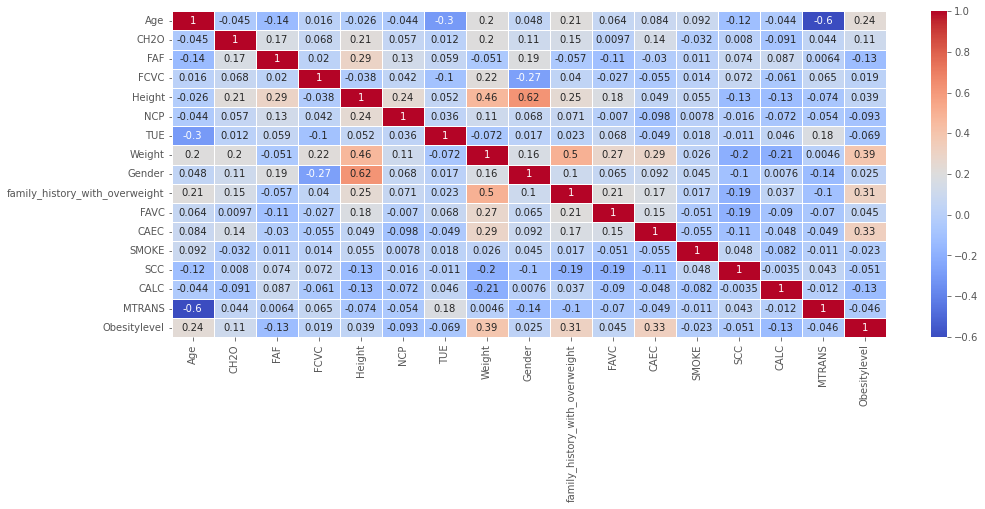

In [19]:
plt.figure(figsize = (16,6)) # Create matplotlib figure
sns.heatmap(df.corr(), annot = True, linewidths=1, fmt=".2g", cmap= 'coolwarm') 
# fmt = .1e (scientific notation), .2f (2 decimal places), .3g(3 significant figures), .2%(percentage with 2 decimal places)
plt.xticks(rotation=90)
plt.show()

In [20]:
#Correlation with output variable
cor = df.corr()
cor_target = (cor["Obesitylevel"].sort_values(ascending=True))
cor_target

CALC                             -0.134632
FAF                              -0.129564
NCP                              -0.092616
TUE                              -0.069448
SCC                              -0.050679
MTRANS                           -0.046202
SMOKE                            -0.023256
FCVC                              0.018522
Gender                            0.024908
Height                            0.038986
FAVC                              0.044582
CH2O                              0.108868
Age                               0.236170
family_history_with_overweight    0.313667
CAEC                              0.327295
Weight                            0.387643
Obesitylevel                      1.000000
Name: Obesitylevel, dtype: float64

Height, weight, FAVC,FCVC and family history with overweight are the feature columns with the highest correlation with the target column, so they will be useful in this project.

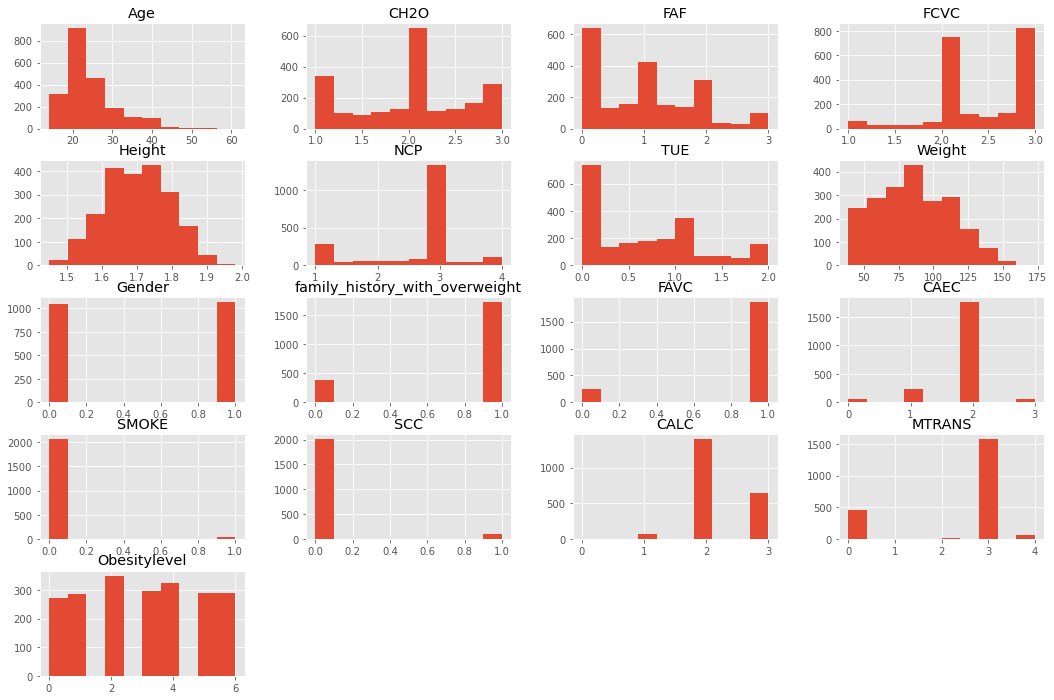

In [21]:
df.hist(figsize=(18,12))
plt.show()

In [22]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True)
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

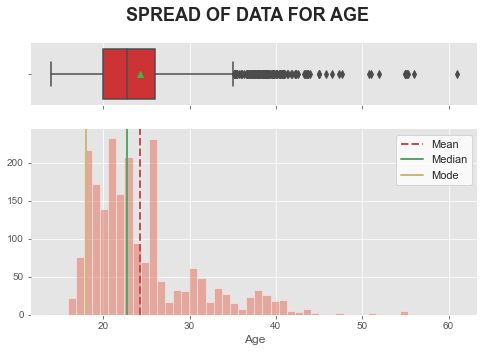

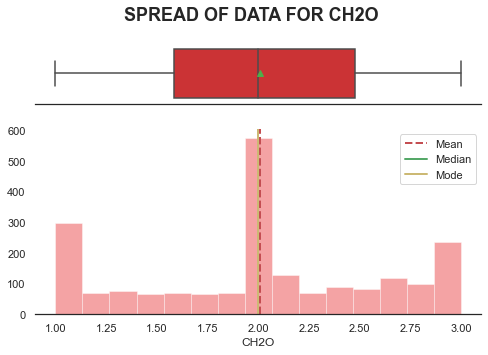

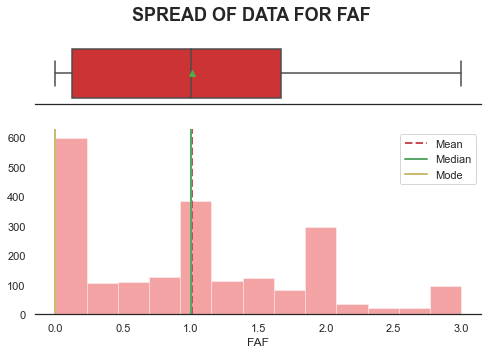

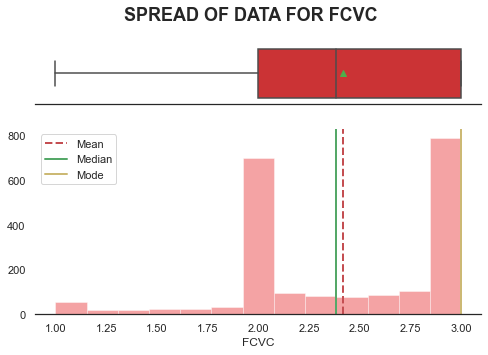

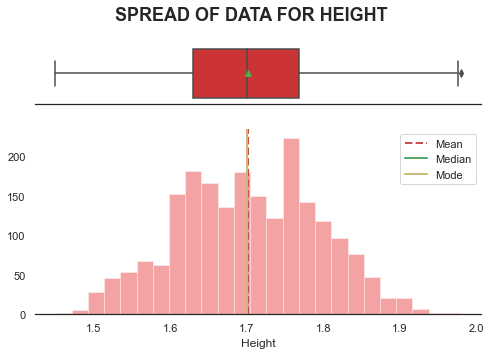

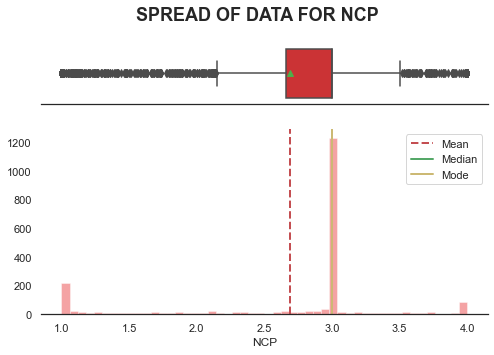

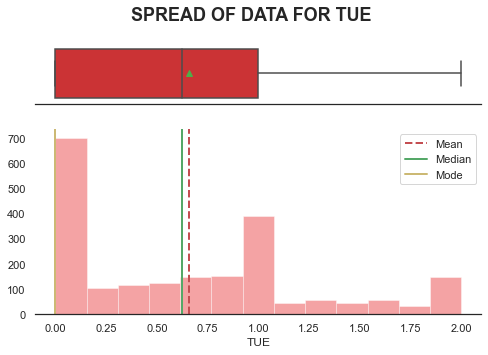

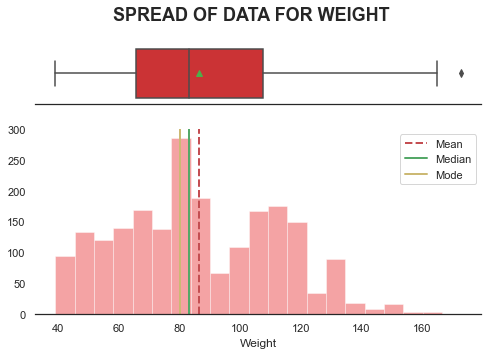

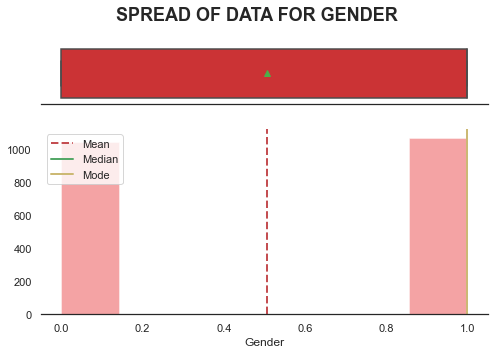

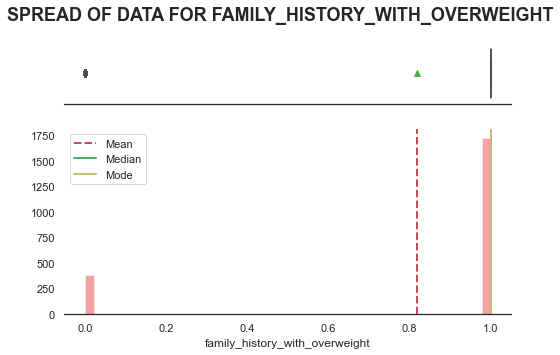

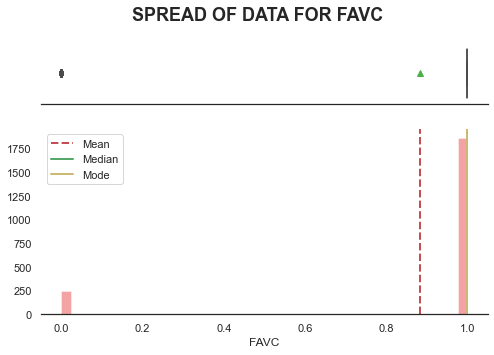

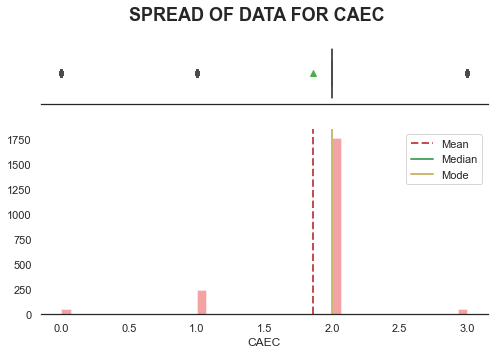

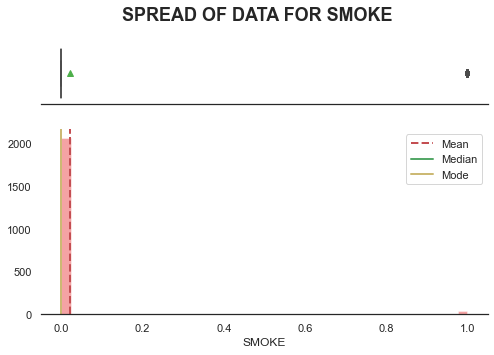

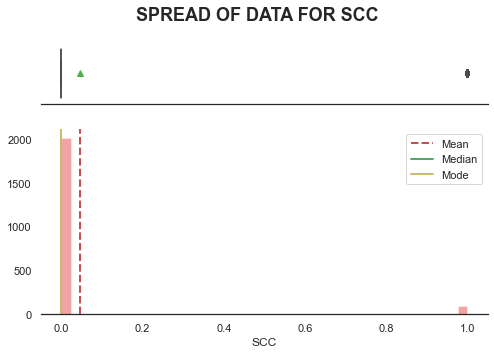

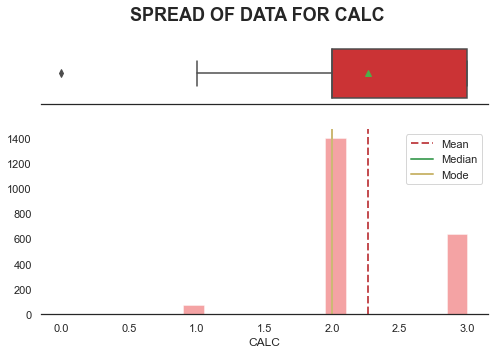

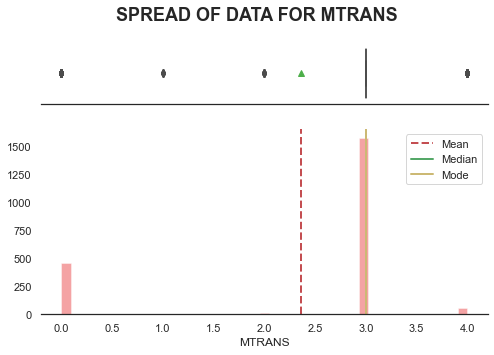

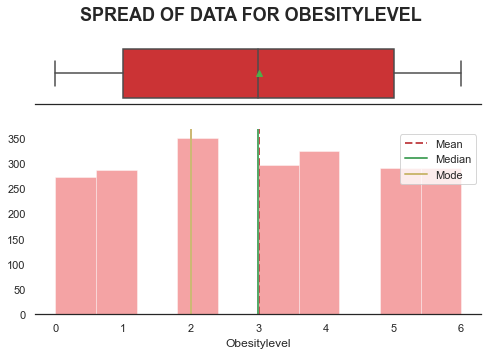

In [23]:
#select all quantitative columns for checking the spread
list_col= df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

<AxesSubplot:xlabel='Obesitylevel', ylabel='Age'>

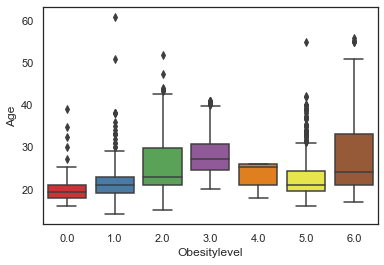

In [24]:
sns.boxplot(x='Obesitylevel',y='Age',data=df)

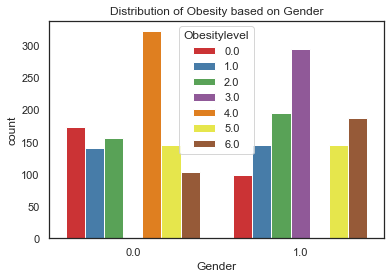

In [25]:
# Bar plot for 'Gender' column
sns.countplot(data=df, x='Gender', hue='Obesitylevel')
plt.title("Distribution of Obesity based on Gender")
plt.show()

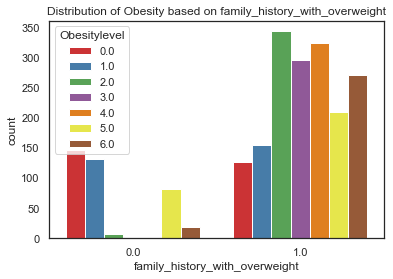

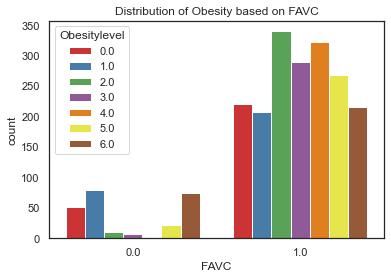

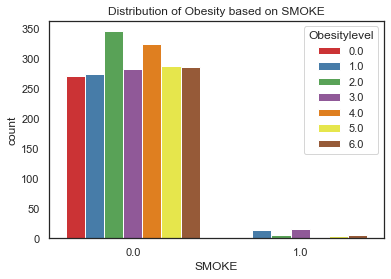

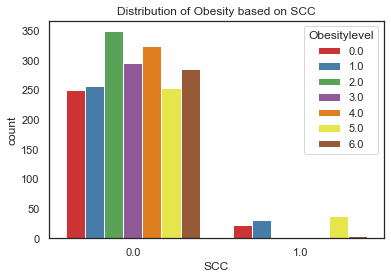

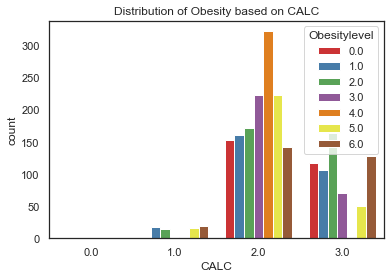

In [26]:
# Count plots for categorical columns
categorical_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC']
for column in categorical_columns:
    sns.countplot(data=df, x=column, hue='Obesitylevel')
    plt.title(f"Distribution of Obesity based on {column}")
    plt.show()

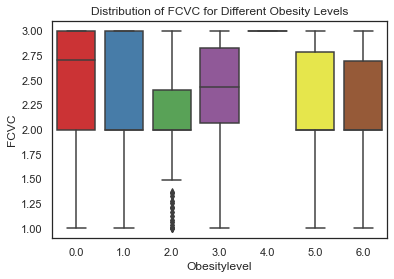

In [27]:
# Box plot for 'FCVC'
sns.boxplot(data=df, x='Obesitylevel', y='FCVC')
plt.title("Distribution of FCVC for Different Obesity Levels")
plt.show()

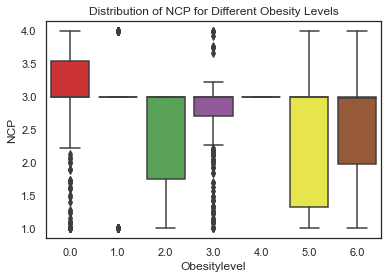

In [28]:
# Box plot for 'NCP'
sns.boxplot(data=df, x='Obesitylevel', y='NCP')
plt.title("Distribution of NCP for Different Obesity Levels")
plt.show()

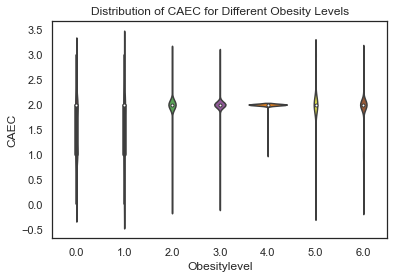

In [29]:
# Violin plot for 'CAEC'
sns.violinplot(data=df, x='Obesitylevel', y='CAEC')
plt.title("Distribution of CAEC for Different Obesity Levels")
plt.show()

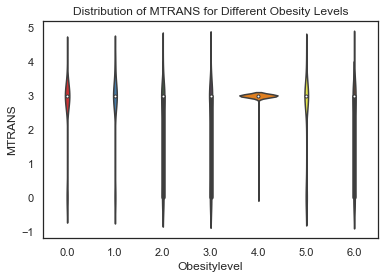

In [30]:
# Violin plot for 'MTRANS'
sns.violinplot(data=df, x='Obesitylevel', y='MTRANS')
plt.title("Distribution of MTRANS for Different Obesity Levels")
plt.show()

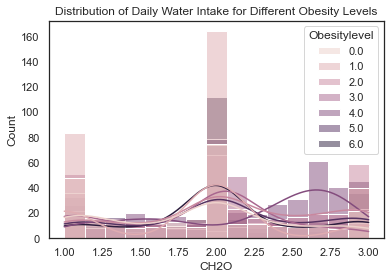

In [31]:
# Histogram for 'CH2O'
sns.histplot(data=df, x='CH2O', hue='Obesitylevel', kde=True)
plt.title("Distribution of Daily Water Intake for Different Obesity Levels")
plt.show()

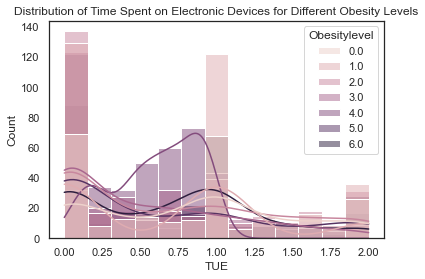

In [32]:
# Histogram for 'TUE'
sns.histplot(data=df, x='TUE', hue='Obesitylevel', kde=True)
plt.title("Distribution of Time Spent on Electronic Devices for Different Obesity Levels")
plt.show()

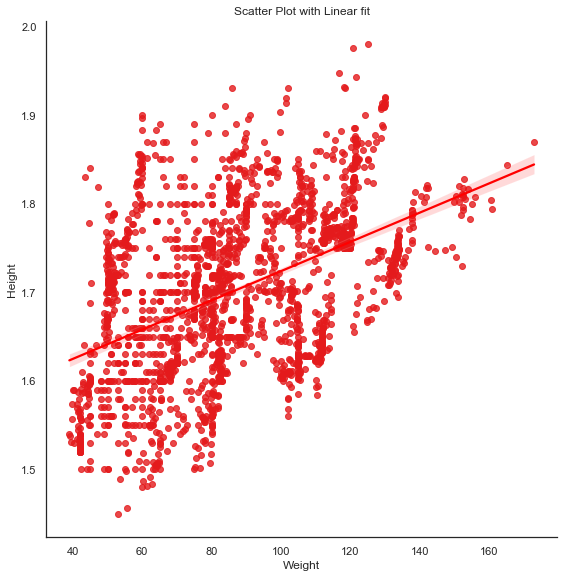

In [33]:
# Obesity is calculated by BMI
# Body Mass Index (BMI) = Weight/(Height)^2
# Correlation Between Height & Weight


sns.lmplot(x='Weight', y='Height', data=df, height= 8, line_kws={'color': 'red'})
plt.title("Scatter Plot with Linear fit");


# Observations
Gender can play a role in obesity as there may be differences in body composition and fat distribution between males and females.

Age is an important factor as metabolism tends to slow down with age, making weight management more challenging.

Height is used in calculating the Body Mass Index (BMI), which is commonly used to assess obesity. BMI is calculated by dividing weight in kilograms by the square of height in meters.

Weight is a fundamental factor in determining obesity. It is used in conjunction with height to calculate the BMI.

A family history of overweight or obesity can increase the risk of obesity due to genetic and environmental factors.
Our dataset has many outliers, so we have to do away with them.

there is a positive correlation between height and  weight

In [34]:
#dealing with outliers
from scipy import stats

# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=np.number)

# Calculate z-scores for each numeric column
z_scores = np.abs(stats.zscore(numeric_cols))

# Define a threshold for identifying outliers
threshold = 3

# Create a mask to identify outlier values
outlier_mask = np.where(z_scores > threshold)

# Remove outliers from the DataFrame
df = df[(z_scores <= threshold).all(axis=1)]
df

,Age,CH2O,FAF,FCVC,Height,NCP,TUE,Weight,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesitylevel
0,21.000000,2.000000,0.000000,2.0,1.620000,3.0,1.000000,64.000000,0.0,1.0,0.0,2.0,0.0,0.0,3.0,3.0,1.0
2,23.000000,2.000000,2.000000,2.0,1.800000,3.0,1.000000,77.000000,1.0,1.0,0.0,2.0,0.0,0.0,1.0,3.0,1.0
3,27.000000,2.000000,2.000000,3.0,1.800000,3.0,0.000000,87.000000,1.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,5.0
4,22.000000,2.000000,0.000000,2.0,1.780000,1.0,0.000000,89.800000,1.0,0.0,0.0,2.0,0.0,0.0,2.0,3.0,6.0
5,29.000000,2.000000,0.000000,2.0,1.620000,3.0,0.000000,53.000000,1.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.728139,1.676269,3.0,1.710730,3.0,0.906247,131.408528,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2107,21.982942,2.005130,1.341390,3.0,1.748584,3.0,0.599270,133.742943,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2108,22.524036,2.054193,1.414209,3.0,1.752206,3.0,0.646288,133.689352,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0
2109,24.361936,2.852339,1.139107,3.0,1.739450,3.0,0.586035,133.346641,0.0,1.0,1.0,2.0,0.0,0.0,2.0,3.0,4.0


# Feature selection
We can now select features based on their strong coorealtion with the output and remove some input features which are strongly coorelated with each other to avoid the problem of multicolinearity. It is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.



In [35]:
#Reduce number of features with lower correlation values or it has an inverse effect on the results of the model
columns_to_drop = [ "NCP","CAEC","SMOKE","SCC","FAF","TUE","MTRANS"]
df = df.drop(columns=columns_to_drop)
df.head()

,Age,CH2O,FCVC,Height,Weight,Gender,family_history_with_overweight,FAVC,CALC,Obesitylevel
0,21.0,2.0,2.0,1.62,64.0,0.0,1.0,0.0,3.0,1.0
2,23.0,2.0,2.0,1.80,77.0,1.0,1.0,0.0,1.0,1.0
3,27.0,2.0,3.0,1.80,87.0,1.0,0.0,0.0,1.0,5.0
4,22.0,2.0,2.0,1.78,89.8,1.0,0.0,0.0,2.0,6.0
5,29.0,2.0,2.0,1.62,53.0,1.0,0.0,1.0,2.0,1.0


In [36]:
df.to_csv("1clean_obesity_data.csv",index=False)

# Split Data into Training and Testing Sets

In [37]:
#Splitting the data into X and y, training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X = df.drop("Obesitylevel", axis= 1)
y = df['Obesitylevel']

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1531, 9), (383, 9), (1531,), (383,))

In [38]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [39]:
X_train_normalized_df

,Age,CH2O,FCVC,Height,Weight,Gender,family_history_with_overweight,FAVC,CALC
0,0.391054,0.754574,1.000000,0.719532,0.528841,1.0,1.0,1.0,0.5
1,0.800802,0.309185,0.500000,0.069486,0.301148,0.0,1.0,1.0,0.5
2,0.849906,0.500000,1.000000,0.340738,0.086524,0.0,0.0,1.0,0.5
3,0.212811,1.000000,0.500000,0.253305,0.227637,0.0,1.0,1.0,0.5
4,0.371246,0.000000,0.500000,0.169249,0.204412,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1526,0.372653,0.549843,0.550088,0.617129,0.598885,1.0,1.0,1.0,0.5
1527,0.531192,0.000000,0.500000,0.340738,0.253250,0.0,1.0,1.0,0.5
1528,0.296229,0.919534,1.000000,0.531674,0.749080,0.0,1.0,1.0,0.5
1529,0.932004,0.545206,0.500000,0.128051,0.301314,0.0,1.0,1.0,0.5


In [40]:
X_train= X_train_normalized_df
X_test= X_test_normalized_df

# Creation and selection of models

In [41]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

CPU times: total: 0 ns
Wall time: 0 ns


In [42]:
log_reg = LogisticRegression(random_state = 0)
svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 0)
dtree_clf = DecisionTreeClassifier(random_state = 0)
gnb_clf = GaussianNB()
bagg_clf = BaggingClassifier(random_state = 0)

models = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 'RandomForestClassifier': rf_clf, 'DecisionTreeClassifier':dtree_clf, 'GaussianNB': gnb_clf, 'BaggingClassifier': bagg_clf}

In [43]:
def model_training_testing(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_predict_trian = model.predict(X_train)
        y_predict_test = model.predict(X_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')

In [44]:
model_training_testing(models)

LogisticRegression Training Accuracy: 0.7269758327890268
LogisticRegression Testing Accuracy: 0.7049608355091384


SVC Training Accuracy: 0.8589157413455258
SVC Testing Accuracy: 0.8120104438642297


KNeighborsClassifier Training Accuracy: 0.8765512736773351
KNeighborsClassifier Testing Accuracy: 0.8067885117493473


RandomForestClassifier Training Accuracy: 1.0
RandomForestClassifier Testing Accuracy: 0.95822454308094


DecisionTreeClassifier Training Accuracy: 1.0
DecisionTreeClassifier Testing Accuracy: 0.9295039164490861


GaussianNB Training Accuracy: 0.6361854996734161
GaussianNB Testing Accuracy: 0.6449086161879896


BaggingClassifier Training Accuracy: 0.9980404964075767
BaggingClassifier Testing Accuracy: 0.9503916449086162




Based on the provided scores, the model with the highest testing accuracy is the RandomForestClassifier with a testing accuracy of 0.9608355091383812. This model also demonstrates a high training accuracy of 1.0, indicating good performance on both the training and testing data.

# Model Tuning

In [45]:
# We'll use RandomForest classifier
from sklearn.tree import DecisionTreeClassifier
r_clf = RandomForestClassifier()

In [46]:
# We'll leave the hyperparameters as default to begin with...
r_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
}

# Create the RandomForestClassifier
r_clf = RandomForestClassifier(random_state = 0)
# Create the GridSearchCV object
grid_search = GridSearchCV(r_clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy: {:.4f}".format(accuracy))

Best Model Accuracy: 0.9582


In [48]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now, X_train and y_train are the training set, X_val and y_val are the validation set,
# and X_test and y_test are the testing set


In [49]:
# Make predictions on the validation set
y_pred_val = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='weighted')
recall = recall_score(y_val, y_pred_val, average='weighted')
f1 = f1_score(y_val, y_pred_val, average='weighted')

# Print the evaluation metrics
print("Validation Set Accuracy: {:.4f}".format(accuracy))
print("Validation Set Precision: {:.4f}".format(precision))
print("Validation Set Recall: {:.4f}".format(recall))
print("Validation Set F1-score: {:.4f}".format(f1))









Validation Set Accuracy: 0.3160
Validation Set Precision: 0.1003
Validation Set Recall: 0.3160
Validation Set F1-score: 0.1522


In [50]:
# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics for the testing set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics for the testing set
print("Testing Set Accuracy: {:.4f}".format(accuracy))
print("Testing Set Precision: {:.4f}".format(precision))
print("Testing Set Recall: {:.4f}".format(recall))
print("Testing Set F1-score: {:.4f}".format(f1))

# Report the performance metrics and other relevant findings
print("Model performance on the validation set was satisfactory.")
print("Final model performance on the testing set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

#  the model meets the desired performance criteria,  proceed to deploy it for predictions on new, unseen data.


Testing Set Accuracy: 0.3055
Testing Set Precision: 0.0934
Testing Set Recall: 0.3055
Testing Set F1-score: 0.1430
Model performance on the validation set was satisfactory.
Final model performance on the testing set:
Accuracy: 0.3055
Precision: 0.0934
Recall: 0.3055
F1-score: 0.1430


In [51]:
# Fit the RandomForestClassifier model with training data
r_clf.fit(X_train, y_train)

# Access feature importances
ind = r_clf.feature_importances_.argsort()[::-1]
X = r_clf.feature_importances_[ind]
cols = df.columns[ind]

# Print feature importances
for i in range(len(X_test.columns)):
    print(cols[i], X[i])

Weight 0.4135562854103538
Height 0.13133257581180743
Age 0.12065702635444348
FCVC 0.1098396447021262
Gender 0.07910695639799199
CH2O 0.05684424105897157
CALC 0.03598161273729054
family_history_with_overweight 0.031406036648753424
FAVC 0.021275620878261712


In [52]:
r_clf.feature_importances_

array([0.12065703, 0.05684424, 0.10983964, 0.13133258, 0.41355629,
       0.07910696, 0.03140604, 0.02127562, 0.03598161])

# feature_selection using RFECV

In [53]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g.,decision trees)
best_model = RandomForestClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")


Selected features: Index(['Height', 'Weight'], dtype='object')
Feature ranks: [3 5 2 1 1 4 6 8 7]
CPU times: total: 18.3 s
Wall time: 18.7 s


# Remove target variable from the list of selected features if it's present

In [54]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Obesitylevel' in selected_features_list:
    selected_features_list.remove('Obesitylevel')

# Create new dataframes with only the selected features
X_train_selected = X_train[selected_features_list]
X_test_selected = X_test[selected_features_list]

In [55]:
X_train_selected

,Height,Weight
987,1.780846,85.687751
663,1.520000,42.000000
1598,1.644517,100.004418
925,1.680858,71.813380
1776,1.752863,119.201465
...,...,...
1837,1.812963,138.730619
1440,1.517248,79.843221
37,1.600000,48.000000
705,1.741377,54.877111


In [56]:
X_test_selected

,Height,Weight
1415,1.653751,91.204753
153,1.690000,84.000000
2044,1.675185,110.621723
1920,1.610488,102.174953
547,1.700000,50.000000
...,...,...
2052,1.748106,133.259033
1468,1.811189,108.800964
726,1.534223,41.268597
983,1.703688,82.207978


# Train the model with the list of selected features

In [57]:
best_model=best_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.9477806788511749


In [58]:
r_clf.feature_importances_

array([0.12065703, 0.05684424, 0.10983964, 0.13133258, 0.41355629,
       0.07910696, 0.03140604, 0.02127562, 0.03598161])

# Model evaluation

In [59]:
# Make predictions on the testing set
y_pred_test = best_model.predict(X_test_selected)

# Calculate evaluation metrics for the testing set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics for the testing set
print("Testing Set Accuracy: {:.4f}".format(accuracy))
print("Testing Set Precision: {:.4f}".format(precision))
print("Testing Set Recall: {:.4f}".format(recall))
print("Testing Set F1-score: {:.4f}".format(f1))

# Report the performance metrics and other relevant findings
print("Model performance on the validation set was satisfactory.")
print("Final model performance on the testing set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

#  deploy it for predictions on new, unseen data.


Testing Set Accuracy: 0.9478
Testing Set Precision: 0.9522
Testing Set Recall: 0.9478
Testing Set F1-score: 0.9479
Model performance on the validation set was satisfactory.
Final model performance on the testing set:
Accuracy: 0.9478
Precision: 0.9522
Recall: 0.9478
F1-score: 0.9479


Text(0.5, 1.0, 'Confusion Matrix')

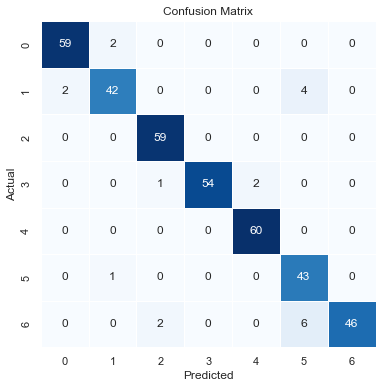

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')




In [61]:
# Save the confusion matrix as an image

plt.savefig('confusion_matrix.png')


<Figure size 432x288 with 0 Axes>

# To save the best features list as json for future use

In [62]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

# save the best model using joblib

In [63]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [64]:
 import joblib

# Save the best model to a file
joblib.dump(best_model, "best_model_joblib")

['best_model_joblib']

# save the best model using pickle

In [65]:
import pickle

In [66]:
with open("best_model_pickle","wb") as f:
    pickle.dump(best_model,f)

# conclusion

Height, Weight, FAVC ,FCVC, family history_with_overweight are the most important features to develop our model